In [1]:
from os import listdir
from pickle import dump as save_to_pickle_file
from typing import Dict, List
# from pandas import DataFrame
from methods import do_case_folding, INDEX_DIR, ARTICLES_DIR,remove_stop_words, preform_stemming_using_porter
# from copy import deepcopy


In [2]:

def create_language_model_from_collection(collection: List[str]) -> Dict[str, float]:
    """
        generate language model from collection

    Args:
        collection (List[str]): [description]

    Returns:
        Dict[str, float]: [description]
    """
    language_model = {}
    counter = 0

    for doc in collection:
        splitted=doc.split()
        counter += len(splitted)
        for word in splitted:
            if word not in language_model:
                language_model[word] = 1
            else:
                language_model[word] += 1
    # print(f"how much words in the collection: {sum(language_model.values())}")

    # calculate probability of a word in the collection
    for word in language_model:
        language_model[word] = round(language_model[word] / counter, 7)
        # language_model[word] = language_model[word] / counter
        # language_model[word] / counter
    print(f"amount of words in collection:{counter}")
    return language_model


In [3]:
res: Dict[str, float] = None
articels = listdir(ARTICLES_DIR)


In [4]:
collection = []
for art in articels:
    with open(f"{ARTICLES_DIR}/{art}", "r") as file:
        collection.append(file.read())


In [5]:
len(collection)

48

In [6]:
    # """
    # 1. create language model from the entire collection
    # 2. remove stop words and create new language model
    # 3. preform case folding and create new language model
    # 4. preform stemming and create new language model
    # """

In [7]:
# language_model for the entire collection, with all the words
basic_language_model=create_language_model_from_collection(collection)

amount of words in collection:351168


In [8]:
# len(collection)

48

In [9]:
def remove_stop_words_from_collection(collection: List[str]) -> List[str]:
    """
    remove stop words from the collection
    """
    return [remove_stop_words(doc) for doc in collection]


In [10]:
collection_without_stop_words = remove_stop_words_from_collection(collection)
language_model_without_stop_words = create_language_model_from_collection(collection_without_stop_words)

amount of words in collection:235258


In [11]:
def preform_case_foldings(collection: List[str]) -> List[str]:
    """
    preform case folding on the collection
    """
    return [do_case_folding (doc) for doc in collection]

In [12]:
collection_case_folded = preform_case_foldings(language_model_without_stop_words)
language_model_case_folded = create_language_model_from_collection(collection_case_folded)

amount of words in collection:41014


In [13]:
#stemming stage
def preform_stemming(collection: List[str]) -> List[str]:
    return [preform_stemming_using_porter(doc) for doc in collection]

In [14]:
collection_stemmed = preform_stemming(collection_case_folded)
language_model_stemmed = create_language_model_from_collection(collection_stemmed)

amount of words in collection:41014


In [15]:
print(len(basic_language_model),len(language_model_without_stop_words),len(language_model_case_folded),len(language_model_stemmed))

41121 41021 32657 28313


In [16]:
# f"change after case folding: {len(language_model_without_stop_words)/len(language_model_case_folded)-1}"

'change after case folding: 0.2561166059344091'

In [17]:
# len(language_model_stemmed)/len(basic_language_model)

0.688528975462659

In [18]:
# set(basic_language_model.keys())-set(language_model_without_stop_words.keys())

In [19]:
collection_without_stop_words_after_all_stages = remove_stop_words_from_collection(collection_stemmed)
language_model_without_stop_words_after_all_stages = create_language_model_from_collection(collection_without_stop_words_after_all_stages)

amount of words in collection:39704


In [20]:
print(len(basic_language_model),len(language_model_without_stop_words),len(language_model_case_folded),len(language_model_stemmed),len(language_model_without_stop_words_after_all_stages))

41121 41021 32657 28313 27957


In [21]:
# amount of words in each collection


In [22]:
def probability_of_word_from_the_language_models(word: str):
    """
    get probability of a word from the language models
    """
    prob:Dict[dict,float] = {}
    if word in basic_language_model:
        print(f"word: {word} is in basic language model and probability is: {basic_language_model[word]:.7f}")
        prob["basic_language_model"] = basic_language_model[word]
        
    if word in language_model_without_stop_words:
        print(f"word: {word} is in language model without stop words and probability is: {language_model_without_stop_words[word]:.7f}")
        prob["language_model_without_stop_words"] = language_model_without_stop_words[word]
        
    word_case_folded = do_case_folding(word)
    if word_case_folded in language_model_case_folded:
        print(f"word: {word_case_folded} is in language model case folded and probability is: {language_model_case_folded[word_case_folded]:.7f}")
        prob["language_model_case_folded"] = language_model_case_folded[word_case_folded]
        
    word_after_stemming = preform_stemming_using_porter(word_case_folded)
    if word_after_stemming in language_model_stemmed:
        print(f"word: {word_after_stemming} is in language model stemmed and probability is: {language_model_stemmed[word_after_stemming]:.7f}")
        prob["language_model_stemmed"] = language_model_stemmed[word_after_stemming]
        
    if word_after_stemming in language_model_without_stop_words_after_all_stages:
        print(f"word: {word_after_stemming} is in language model stemmed and removed all stop words again and probability is: {language_model_without_stop_words_after_all_stages[word_after_stemming]:.7f}")
        prob["language_model_without_stop_words_after_all_stages"] = language_model_without_stop_words_after_all_stages[word_after_stemming]
    return prob

In [23]:
query="Museum visitors’ behavior"
res={}
for word in query.split():
    print(f"{word =}")
    res[word]= probability_of_word_from_the_language_models(word)
    print("\n")

word ='Museum'
word: Museum is in basic language model and probability is: 0.0019222
word: Museum is in language model without stop words and probability is: 0.0028692
word: museum is in language model case folded and probability is: 0.0002194
word: museum is in language model stemmed and probability is: 0.0004876
word: museum is in language model stemmed and removed all stop words again and probability is: 0.0005037


word ='visitors’'
word: visitors’ is in basic language model and probability is: 0.0019364
word: visitors’ is in language model without stop words and probability is: 0.0028904
word: visitors is in language model case folded and probability is: 0.0004389
word: visitor is in language model stemmed and probability is: 0.0006339
word: visitor is in language model stemmed and removed all stop words again and probability is: 0.0006548


word ='behavior'
word: behavior is in basic language model and probability is: 0.0018510
word: behavior is in language model without stop wor

In [24]:
probs=[]
for lm in list(res['Museum'].keys()):
    prob=1
    for k in res:
        prob*=res[k][lm]
    print(f"probability of the query '{query}' in the language model '{lm}' is {prob:.10f}")
    probs.append(prob)

probability of the query 'Museum visitors’ behavior' in the language model 'basic_language_model' is 0.0000000069
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_without_stop_words' is 0.0000000229
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_case_folded' is 0.0000000000
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_stemmed' is 0.0000000001
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_without_stop_words_after_all_stages' is 0.0000000001


In [25]:
from matplotlib import pyplot as plt


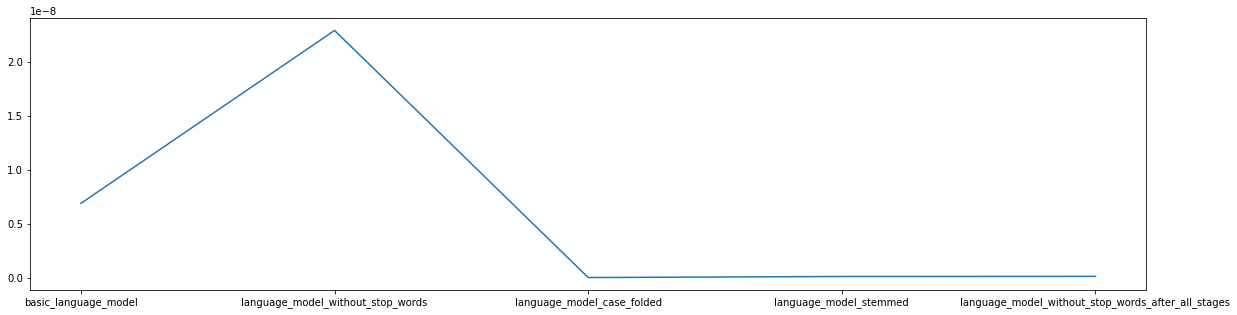

In [27]:
plt.figure(figsize=(20,5))
plt.plot(list(res['Museum'].keys()),probs)

In [29]:
class LanguageModelDetails:
    name:str
    amount_of_words_in_collection:int
    collection:List[str]
    lm:Dict[str,float]
    
    def __init__(self,name:str,collection:List[str],lm:Dict[str,float]):
        self.name=name
        self.collection=collection
        self.lm=lm
        self.amount_of_words_in_collection=0
        for doc in collection:
            self.amount_of_words_in_collection+=len(doc.split())
    
    def get_lm_size(self):
        return len(self.lm)
    
        

In [ ]:
#TODO: change the code to use this class

In [31]:
basic=LanguageModelDetails("basic",collection,basic_language_model)
stop_words=LanguageModelDetails("stopwords",collection_without_stop_words,language_model_without_stop_words)
case_folded=LanguageModelDetails("case_folded",collection_case_folded,language_model_case_folded)
stemmed=LanguageModelDetails("stemmed",collection_stemmed,language_model_stemmed)
after_all_stages=LanguageModelDetails("after_all_stages",collection_without_stop_words_after_all_stages,language_model_without_stop_words_after_all_stages)
objects=[basic,stop_words,case_folded,stemmed,after_all_stages]

In [33]:
for obj in objects:
    print(f"{obj.name} has {obj.get_lm_size()} words in the language model, and {obj.amount_of_words_in_collection} words in the collection\n")

basic has 41121 words in the language model, and 351168 words in the collection

stopwords has 41021 words in the language model, and 235258 words in the collection

case_folded has 32657 words in the language model, and 41014 words in the collection

stemmed has 28313 words in the language model, and 41014 words in the collection

after_all_stages has 27957 words in the language model, and 39704 words in the collection



In [34]:
import pandas as pd


In [45]:
data={}
for obj in objects:
    data[obj.name]=[obj.get_lm_size(),obj.amount_of_words_in_collection]
df=pd.DataFrame.from_dict(data,columns=["amount_of_words_in_collection","amount_of_words_in_lm"][::-1],orient="index")


In [46]:
df

,amount_of_words_in_lm,amount_of_words_in_collection
basic,41121,351168
stopwords,41021,235258
case_folded,32657,41014
stemmed,28313,41014
after_all_stages,27957,39704
